# Data analysis - part 1

## Import package

In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np

## Read preprocessed data 

In [41]:
gdf = gpd.read_file("gdf_all_data.geojson")
df = pd.read_csv("all_data.csv")
# for col in gdf.columns:
#     print(col)'

#drop missing data    
gdf = gdf.dropna()
gdf

,datetime,time,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,...,mode,tripNr,User,recid,d_dist,d_time,vel,acc,vel_corr,geometry
1,2017-06-22 08:46:46.620,1.498121e+12,0.711295,0.667593,-0.021792,0.218854,0.164321,6.407377,-1.372446,1005.113749,...,unlabelled,220617.02,User1,220617,2.664046,3.229999,2.969217,0.285415,2.969217,POINT (50.84696 -0.13339)
3,2017-06-22 08:46:53.430,1.498121e+12,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,...,Walking,220617.00,User1,220617,1.026499,1.000000,3.695396,7.181507,3.695396,POINT (50.84689 -0.13338)
4,2017-06-22 08:46:57.440,1.498121e+12,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,...,Walking,220617.00,User1,220617,12.115659,4.009999,10.876903,-1.129117,10.876903,POINT (50.84678 -0.13338)
5,2017-06-22 08:47:03.450,1.498121e+12,0.731013,0.662975,-0.075235,0.142905,2.077009,-1.596077,-5.836242,1005.188397,...,Walking,220617.00,User1,220617,10.599545,6.009999,6.349146,0.012140,6.349146,POINT (50.84669 -0.13341)
6,2017-06-22 08:47:21.480,1.498121e+12,0.630252,0.742655,-0.017601,0.225683,-1.098918,-4.058797,0.492881,1005.074037,...,Walking,220617.00,User1,220617,32.164061,18.030000,6.422109,-0.033330,6.422109,POINT (50.84640 -0.13339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16031,2017-07-18 15:06:15.450,1.500390e+12,0.996731,-0.006703,-0.001635,-0.080490,-0.042024,-0.027680,0.009800,1011.395730,...,unlabelled,180717.02,User2,180717,9.542395,29.169999,1.177670,-0.002281,1.177670,POINT (51.08274 0.75708)
16032,2017-07-18 15:06:54.470,1.500390e+12,0.996715,-0.005742,0.000456,-0.080777,-0.000100,-0.010741,-0.000100,1011.402587,...,unlabelled,180717.02,User2,180717,12.043438,39.020000,1.111132,-0.028289,1.111132,POINT (51.08284 0.75704)
16039,2017-07-18 15:08:43.760,1.500391e+12,0.395932,-0.011232,0.008839,-0.918168,-0.006400,0.011500,0.009258,1011.333291,...,unlabelled,180717.02,User2,180717,1.562757,16.040000,0.350743,-0.017146,0.350743,POINT (51.08305 0.75664)
16040,2017-07-18 15:08:50.810,1.500391e+12,0.395975,-0.011271,0.008755,-0.918149,0.011910,0.009915,-0.009600,1011.347102,...,unlabelled,180717.02,User2,180717,0.148299,7.049999,0.075727,-0.010741,0.075727,POINT (51.08305 0.75664)


## Divide the preprocessed data into two parts according to the user

In [21]:
# extract gdf of user1 and user2
gdf_user1 = gdf[gdf['User']=='User1'].reset_index()
gdf_user2 = gdf[gdf['User']=='User2'].reset_index()


## Plot the recorded GPS points of user1 with folium and matplotlib

Text(0, 0.5, 'Latitude')

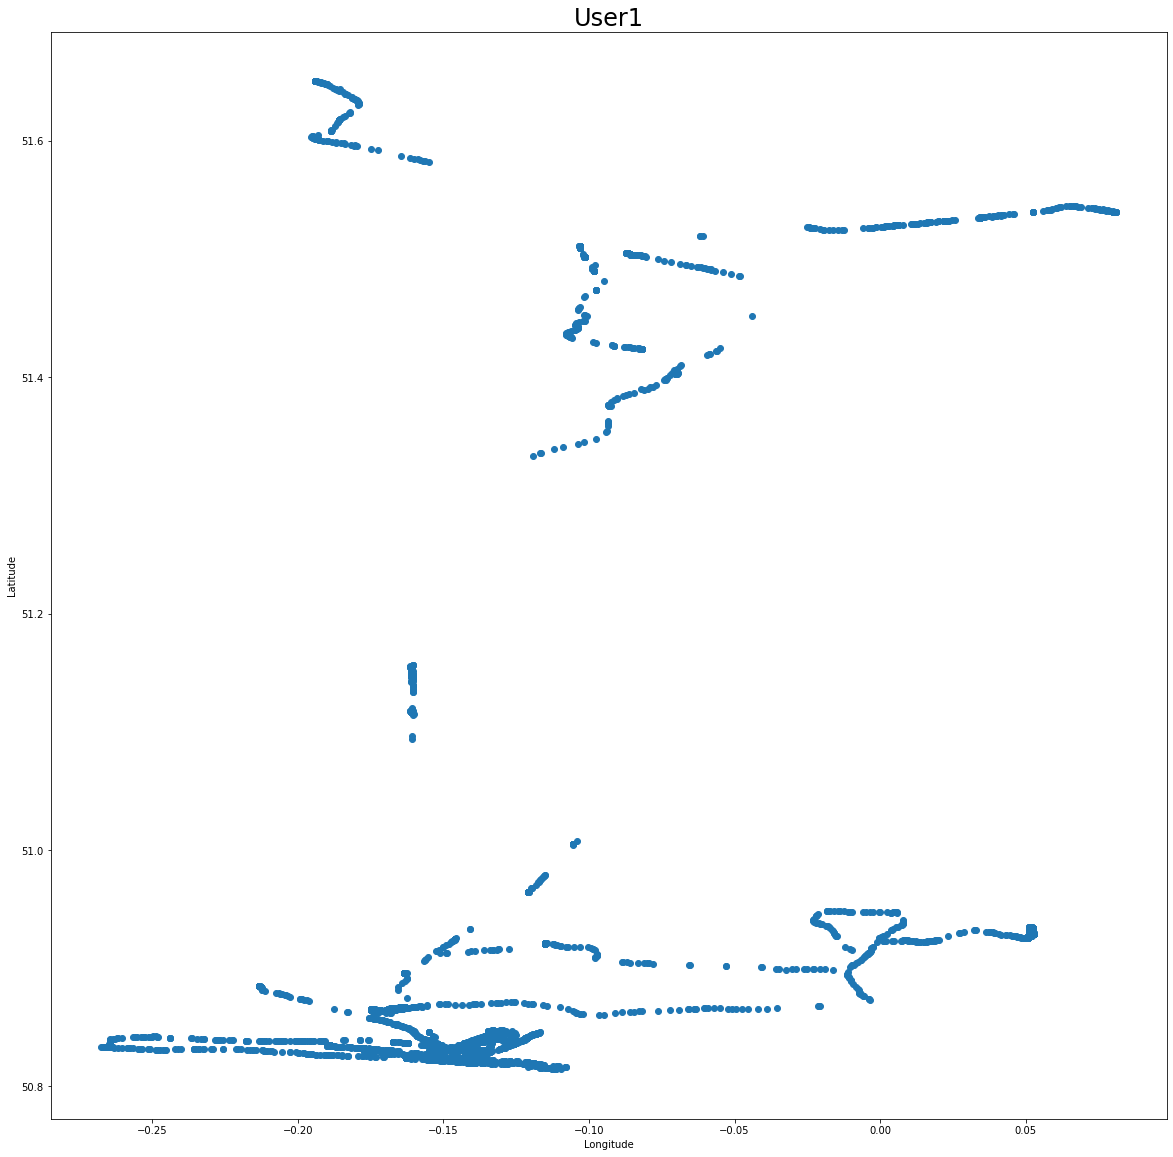

In [22]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
# plot with folium
map_obj = folium.Map(location = [51.2, -0.1], zoom_start = 9)
maxvel_user1 = np.max(gdf_user1.vel)
# print(maxvel_user1)
# weight: gdf_user1.vel[i]/maxvel_user1
lats_longs = [[gdf_user1.geometry[i].x, gdf_user1.geometry[i].y,1] for i in range(len(gdf_user1))]
HeatMap(lats_longs).add_to(map_obj)
display(map_obj)
# plot with matplotlib
fig, ax = plt.subplots(figsize = (20,20))
plt.rcParams.update({'font.size': 20})

ax.scatter(gdf_user1.geometry.y.values,
              gdf_user1.geometry.x.values)
ax.set_title('User1')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

## Plot the recorded GPS points of user2 with folium and matplotlib

Text(0, 0.5, 'Latitude')

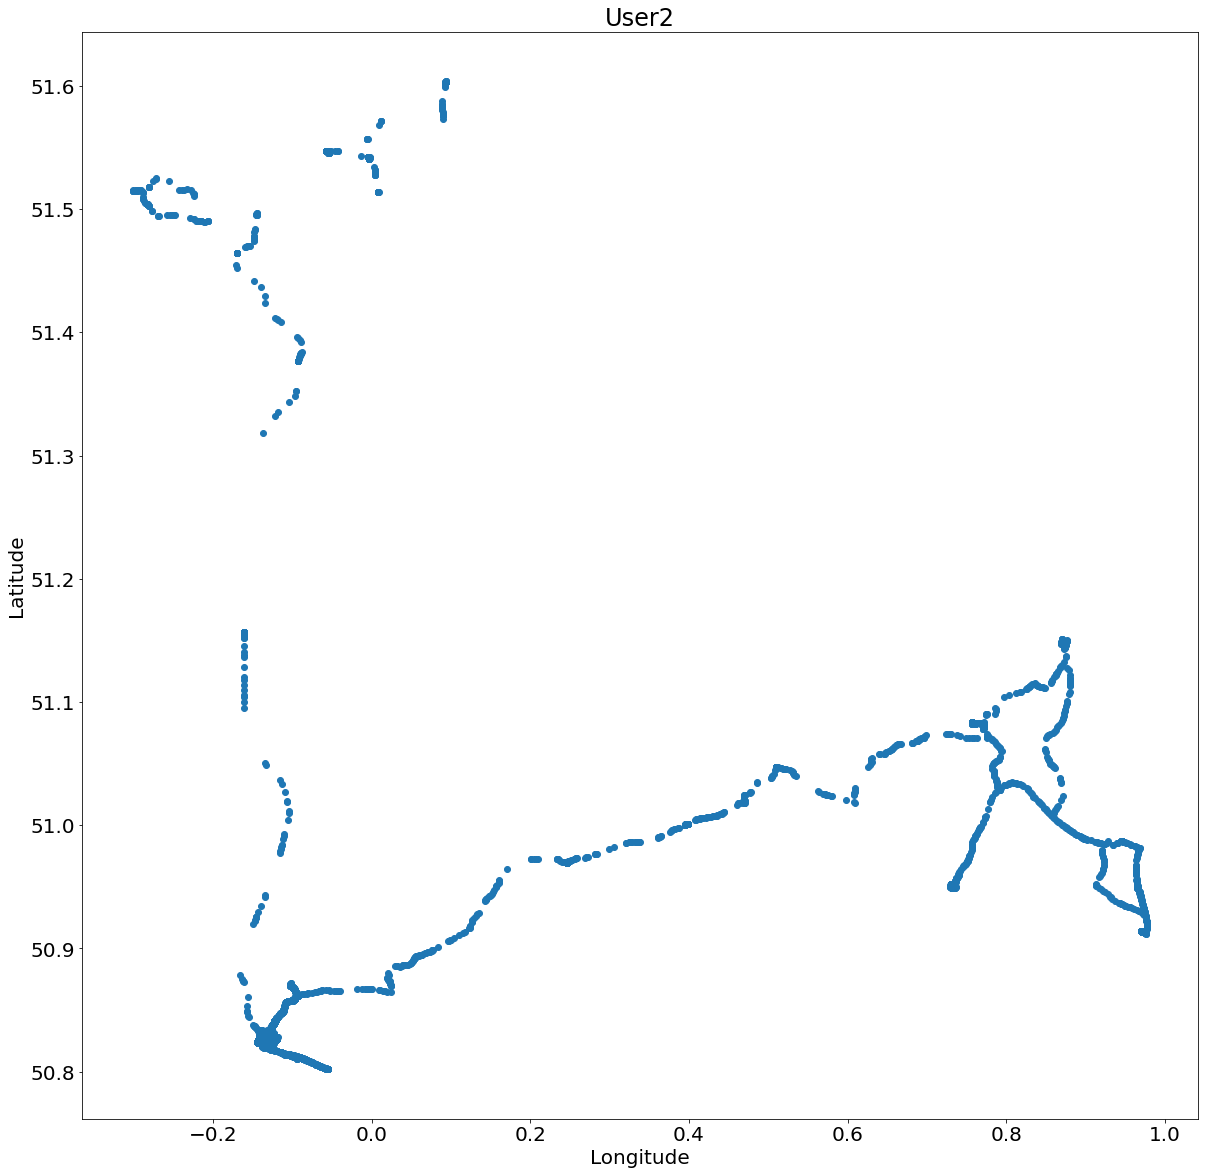

In [25]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
# plot with folium
map_obj = folium.Map(location = [51.2, -0.1], zoom_start = 9)
lats_longs = [[gdf_user2.geometry[i].x, gdf_user2.geometry[i].y,1] for i in range(len(gdf_user2))]
HeatMap(lats_longs).add_to(map_obj)
display(map_obj)
# plot with matplotlib
fig, ax = plt.subplots(figsize = (20,20))
plt.rcParams.update({'font.size': 20})
ax.scatter(gdf_user2.geometry.y.values,
              gdf_user2.geometry.x.values)
ax.set_title('User2')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [26]:
print('Proportion of data without mode label:',len(gdf[gdf['mode']=='unlabelled'])/len(gdf)*100,'%')

Proportion of data without mode label: 32.15285660234582 %


In [27]:
gdf_o_unlabel = gdf[gdf['mode']!='unlabelled']
gdf_o_unlabel['mode']

3        Walking
4        Walking
5        Walking
6        Walking
7        Walking
          ...   
15980      Still
15981      Still
15982      Still
15983      Still
15984      Still
Name: mode, Length: 8966, dtype: object

In [33]:
#extract those columns in which the outliers can be checked 
var = ['oriW', 'oriX', 'oriY', 'oriZ', 'LaccX','LaccY', 'LaccZ', 'pressure', 'temp', 
                'gyr', 'mag', 'grav', 'HAGL', 'vel', 'acc', 'vel_corr']
#extract data which are unlabelled
gdf_unlabel = gdf[gdf['mode']=='unlabelled']
#extract data which are without unlabelled but with above columns
gdf_w_unlabel = gdf_o_unlabel[var]
#initiate gdf1 and get those data which are not (smaller than first quartile - 3* interquartile range or  bigger than third quartile + 3* interquartile range)
q1=gdf_w_unlabel[var[0]].quantile(0.25)
q3=gdf_w_unlabel[var[0]].quantile(0.75)
IQR=q3-q1
gdf1 = gdf_w_unlabel[~((gdf_w_unlabel[var[0]]<(q1-3*IQR)) | (gdf_w_unlabel[var[0]]>(q3+3*IQR)))]
#print outlier no. in oriW
print(var[0],len(gdf_w_unlabel)-len(gdf1))
#print outlier in other columns in every loop would the colum in which outliers already filtered right joined to the previous df
for i in var:
    if i != var[0]:
        q1=gdf_w_unlabel[i].quantile(0.25)
        q3=gdf_w_unlabel[i].quantile(0.75)
        IQR=q3-q1
        preLen = len(gdf_w_unlabel) 
        gdf_m = gdf_w_unlabel[~((gdf_w_unlabel[i]<(q1-4*IQR)) | (gdf_w_unlabel[i]>(q3+4*IQR)))]
        newLen = len(gdf_m)
        gdf1 = gdf1.merge(gdf_m, how='right')
        print(i,preLen-newLen)
# left join after filtered gdf with preprocessed data at the beginning
gdf1 = gdf1.merge(gdf,how='left')
#concatenate the df in which outliers are filtered with those dataframe with unlabelled mode
gdf_o_outlier = pd.concat([gdf1,gdf_unlabel]).reset_index()
gdf_o_outlier

oriW 0
oriX 0
oriY 0
oriZ 0
LaccX 789
LaccY 828
LaccZ 635
pressure 0
temp 0
gyr 144
mag 146
grav 330
HAGL 9
vel 3
acc 682
vel_corr 3


,index,oriW,oriX,oriY,oriZ,LaccX,LaccY,LaccZ,pressure,temp,...,accuracy,lat,long,mode,tripNr,User,recid,d_dist,d_time,geometry
0,0,0.717173,0.672209,-0.103821,0.151705,-0.670852,-4.799349,-0.619527,1005.110957,0.00000,...,48.0,50.846889,-0.133378,Walking,220617.00,User1,220617,1.026499,1.000000,POINT (50.84689 -0.13338)
1,1,0.729197,0.662254,-0.089967,0.146949,-1.006420,-2.853471,0.186316,1005.147842,0.00000,...,48.0,50.846780,-0.133376,Walking,220617.00,User1,220617,12.115659,4.009999,POINT (50.84678 -0.13338)
2,2,0.731013,0.662975,-0.075235,0.142905,2.077009,-1.596077,-5.836242,1005.188397,0.00000,...,48.0,50.846687,-0.133410,Walking,220617.00,User1,220617,10.599545,6.009999,POINT (50.84669 -0.13341)
3,3,0.630252,0.742655,-0.017601,0.225683,-1.098918,-4.058797,0.492881,1005.074037,0.00000,...,16.0,50.846398,-0.133393,Walking,220617.00,User1,220617,32.164061,18.030000,POINT (50.84640 -0.13339)
4,4,0.608793,0.639916,0.197451,0.425307,-1.526359,-4.556273,0.744179,1005.048085,0.00000,...,16.0,50.846305,-0.133326,Walking,220617.00,User1,220617,11.335122,7.009999,POINT (50.84631 -0.13333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13207,16031,0.996731,-0.006703,-0.001635,-0.080490,-0.042024,-0.027680,0.009800,1011.395730,36.12500,...,24.0,51.082736,0.757080,unlabelled,180717.02,User2,180717,9.542395,29.169999,POINT (51.08274 0.75708)
13208,16032,0.996715,-0.005742,0.000456,-0.080777,-0.000100,-0.010741,-0.000100,1011.402587,35.62500,...,24.0,51.082841,0.757038,unlabelled,180717.02,User2,180717,12.043438,39.020000,POINT (51.08284 0.75704)
13209,16039,0.395932,-0.011232,0.008839,-0.918168,-0.006400,0.011500,0.009258,1011.333291,33.15625,...,48.0,51.083050,0.756637,unlabelled,180717.02,User2,180717,1.562757,16.040000,POINT (51.08305 0.75664)
13210,16040,0.395975,-0.011271,0.008755,-0.918149,0.011910,0.009915,-0.009600,1011.347102,33.09375,...,48.0,51.083049,0.756638,unlabelled,180717.02,User2,180717,0.148299,7.049999,POINT (51.08305 0.75664)


## 1a) Number of tracks per transportation mode

no. of trips per mode:
 mode
Bike          11
Bus           17
Car           15
Run            5
Still         24
Subway        10
Train          8
Walking       56
unlabelled     6
Name: tripNr, dtype: int64


Text(0.5, 0, 'Mode')

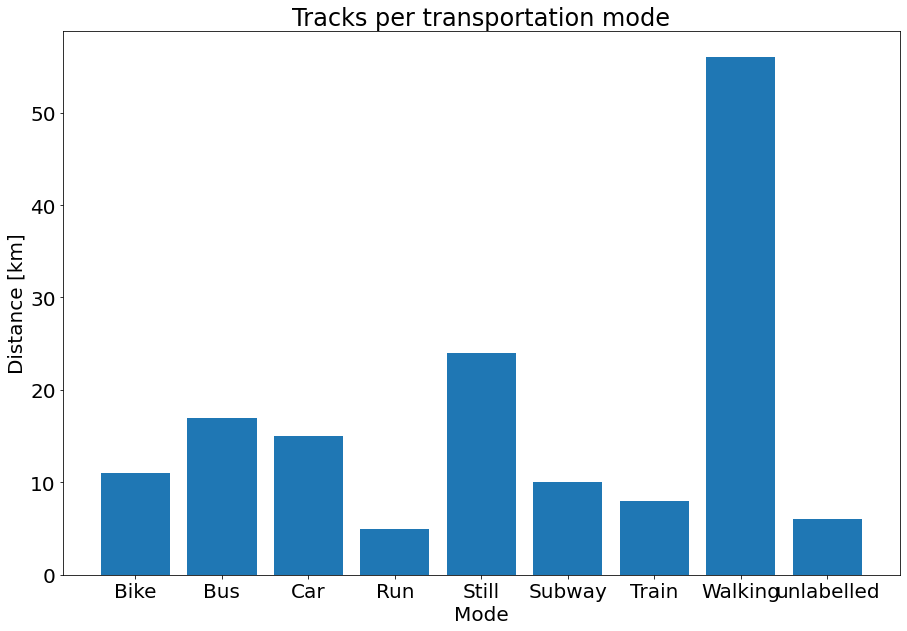

In [92]:
print('no. of trips per mode:\n',gdf_o_outlier.groupby('mode')['tripNr'].nunique())
len(gdf_o_outlier['tripNr'].unique())
fig,ax= plt.subplots(1,figsize=(15,10))
ax.bar(gdf_o_outlier.groupby('mode')['tripNr'].nunique().index,gdf_o_outlier.groupby('mode')['tripNr'].nunique()[:])
ax.set_title('Tracks per transportation mode')
ax.set_ylabel("Distance [km]")
ax.set_xlabel("Mode")

## 1b) Distance / duration per mode

distance per mode:
 mode
Bike           35.056764
Bus            36.797897
Car           198.457040
Run             5.158294
Still           2.413888
Subway         57.049029
Train         101.638181
Walking        24.425266
unlabelled    418.948533
Name: d_dist, dtype: float64
duration per mode:
 mode
Bike           2.945483
Bus            2.877892
Car            4.659964
Run            0.580044
Still          2.995344
Subway         1.968858
Train          1.659831
Walking        5.391822
unlabelled    47.474619
Name: d_time, dtype: float64


Text(0.5, 0, 'Mode')

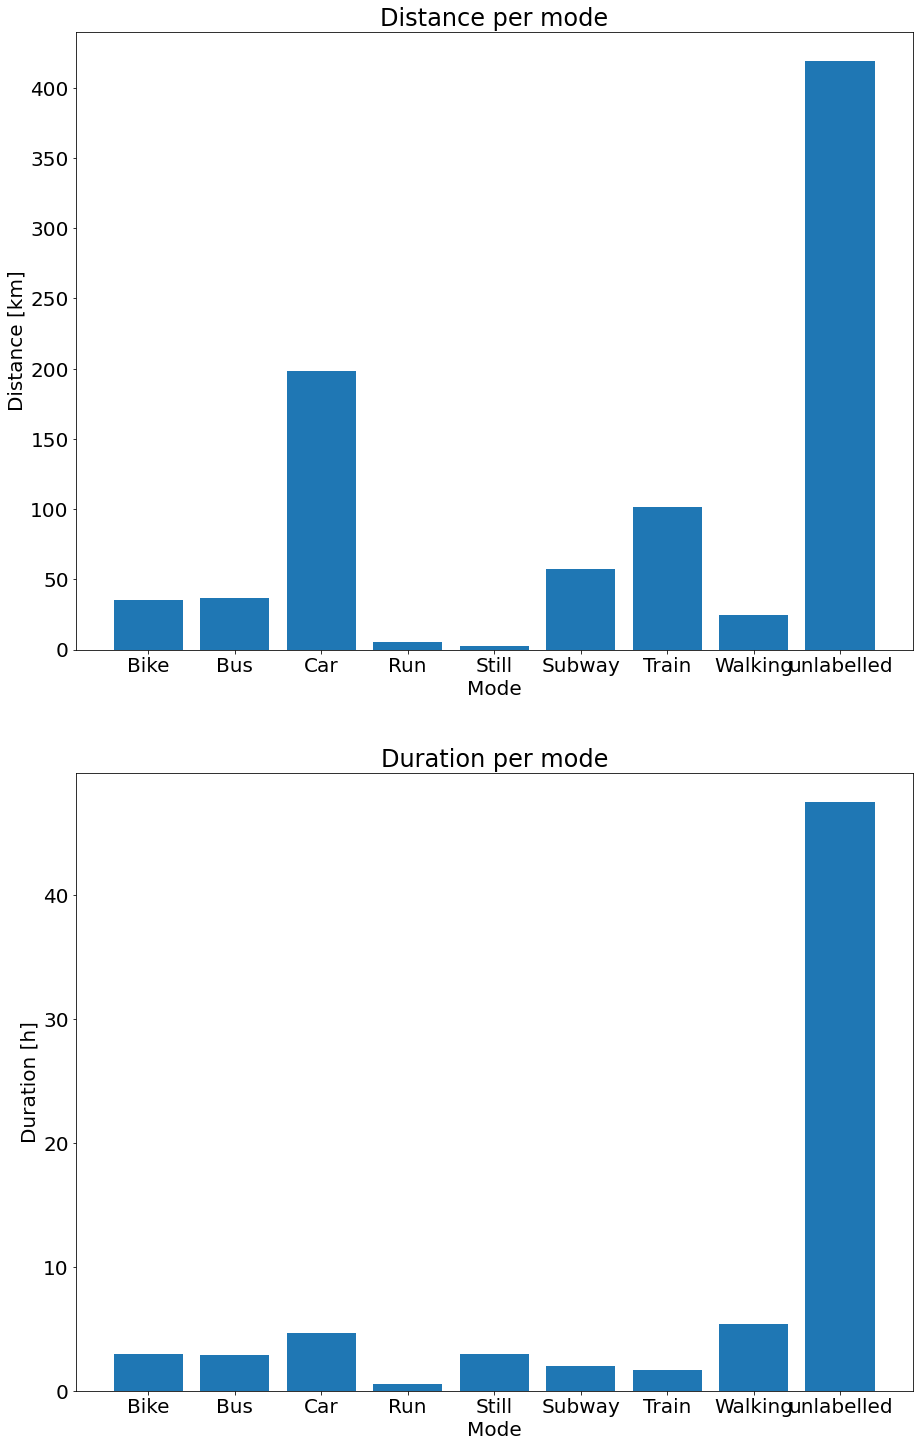

In [95]:
print('distance per mode:\n',gdf_o_outlier.groupby('mode')['d_dist'].sum()/1000)
print('duration per mode:\n',gdf_o_outlier.groupby('mode')['d_time'].sum()/3600)
fig,ax= plt.subplots(2,figsize=(15,25))
ax[0].bar(gdf_o_outlier.groupby('mode')['d_dist'].sum().index,gdf_o_outlier.groupby('mode')['d_dist'].sum()[:]/1000)
ax[0].set_title('Distance per mode')
ax[0].set_ylabel("Distance [km]")
ax[0].set_xlabel("Mode")
ax[1].bar(gdf_o_outlier.groupby('mode')['d_time'].sum().index,gdf_o_outlier.groupby('mode')['d_time'].sum()[:]/3600)
ax[1].set_title('Duration per mode')
ax[1].set_ylabel("Duration [h]")
ax[1].set_xlabel("Mode")

## 1c) Average and maximum velocity / acceleration per mode

In [43]:
print('total mean average velocity: {} km/h'.format(gdf_o_outlier['vel'].mean()))
mean_average = gdf_o_outlier[['mode','vel','acc','vel_corr']].groupby('mode').mean()
print('mean average velocity / accelerarion / corrected velocity per mode:\n',mean_average)

total mean average velocity: 14.07116414221949 km/h
mean average velocity / accelerarion / corrected velocity per mode:
                   vel       acc   vel_corr
mode                                      
Bike        11.605067 -0.068922  11.605067
Bus         12.206804 -0.119703  12.206804
Car         42.860642 -0.001215  42.860642
Run          8.703285 -0.041297   8.703285
Still        0.963583 -0.047676   0.963583
Subway      30.470965 -0.206123  30.470965
Train       46.937287 -0.045236  46.937287
Walking      4.458979 -0.031973   4.458979
unlabelled   1.846998 -0.023117   1.846998


## 1d) Average distance / duration / velocity per track per mode

In [69]:
#use groupby to get total distance and duration
a = gdf_o_outlier.groupby(['tripNr','mode'])[['d_dist','d_time']].sum()
#use groupby to get average velocity and average corrected velocity
b = gdf_o_outlier.groupby(['tripNr','mode'])[['vel_corr','vel']].mean()
#merge above two df in order to get average distance / duration / velocity per track per mode
gdf_join = a.merge(b,on = ['tripNr','mode'],how = 'left').rename(columns={'d_dist':'total_distance_m', 'd_time':'total_duration_s', 'vel_corr':'vel_corr_mean','vel':'vel_mean'}).reset_index()
print('Average distance / duration / velocity per track per mode:\n')
gdf_join

Average distance / duration / velocity per track per mode:



,tripNr,mode,total_distance_m,total_duration_s,vel_corr_mean,vel_mean
0,140617.000,Run,655.607087,241.889990,9.618836,9.618836
1,140617.001,Walking,257.166103,193.629993,4.687925,4.687925
2,140617.002,Run,741.798973,275.979984,9.768308,9.768308
3,140617.003,Walking,227.277619,165.599995,4.735657,4.735657
4,140617.004,Run,786.320733,285.019987,9.609419,9.609419
...,...,...,...,...,...,...
147,270617.015,Still,93.691111,403.229980,0.811631,0.811631
148,270617.016,Train,16505.660022,752.729973,41.866824,41.866824
149,270617.017,Bike,1915.268821,550.479969,13.210243,13.210243
150,270617.018,Still,102.141693,106.629994,2.322997,2.322997


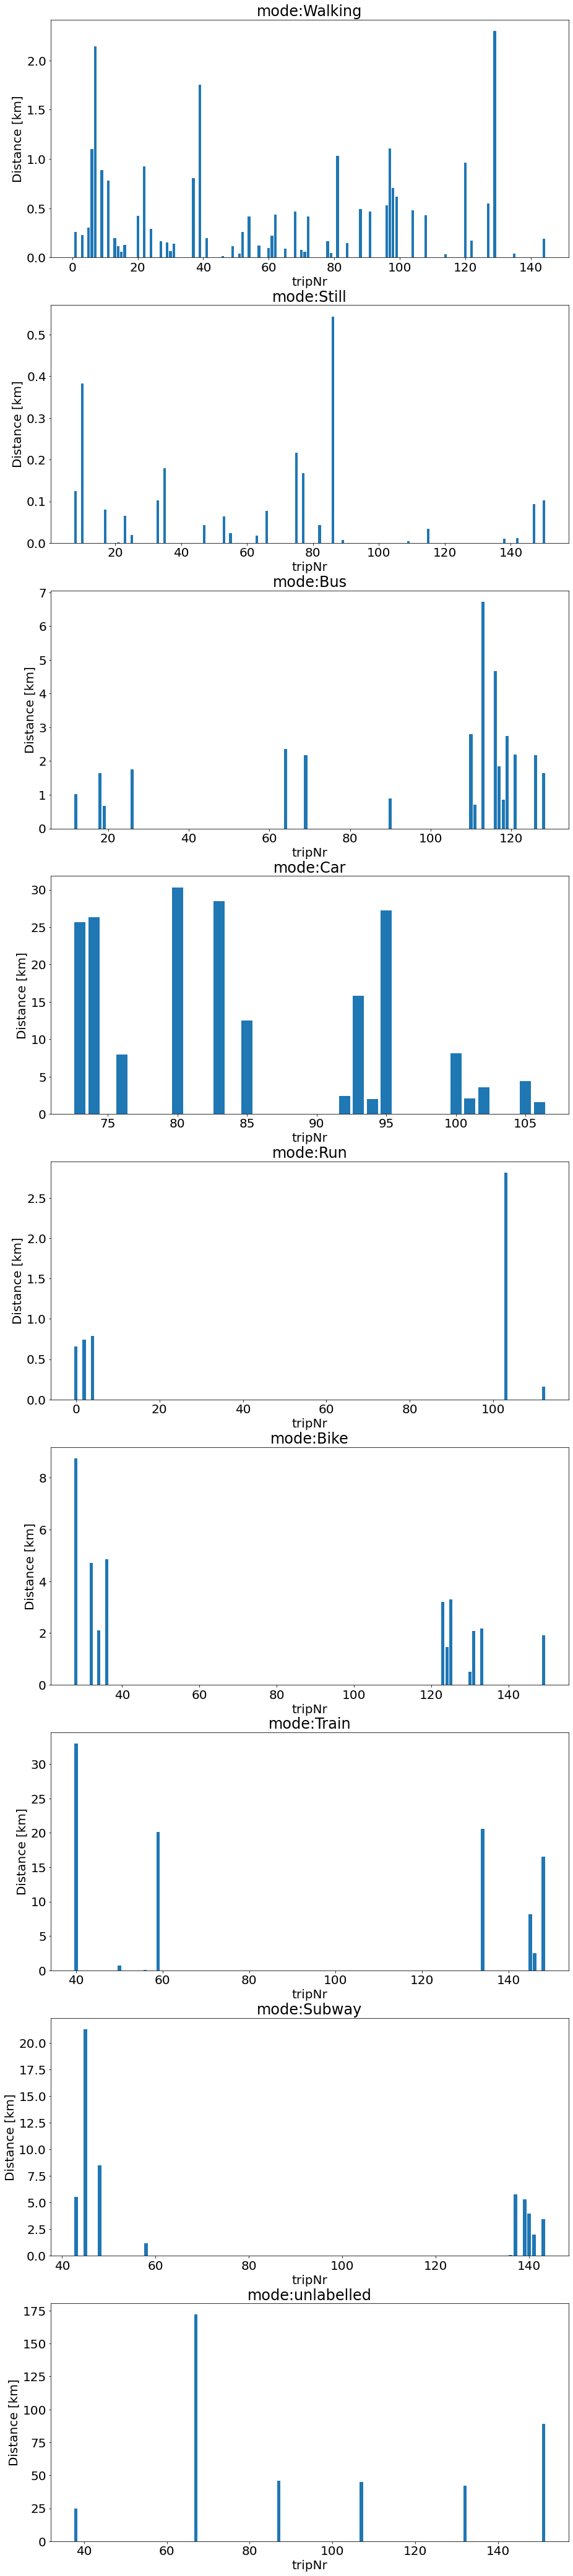

In [70]:
#visualize the distance every reseted trip per mode 
every_trip = []
distance = []
mode = gdf_o_outlier['mode'].unique()
# duration = gdf_join.total_duration_s

fig,ax= plt.subplots(len(mode),figsize=(15,75))

index =0
for i in mode:
    for j in range(len(gdf_join)):
        if gdf_join.iloc[j,1] == i:
            every_trip.append(gdf_join.index[j])
            distance.append(gdf_join.total_distance_m[j]/1000)
    ax[index].bar(every_trip,distance)
    ax[index].set_title('mode:'+i)
    ax[index].set_ylabel("Distance [km]")
    ax[index].set_xlabel("tripNr")
    every_trip = []
    distance = []
    index = index + 1

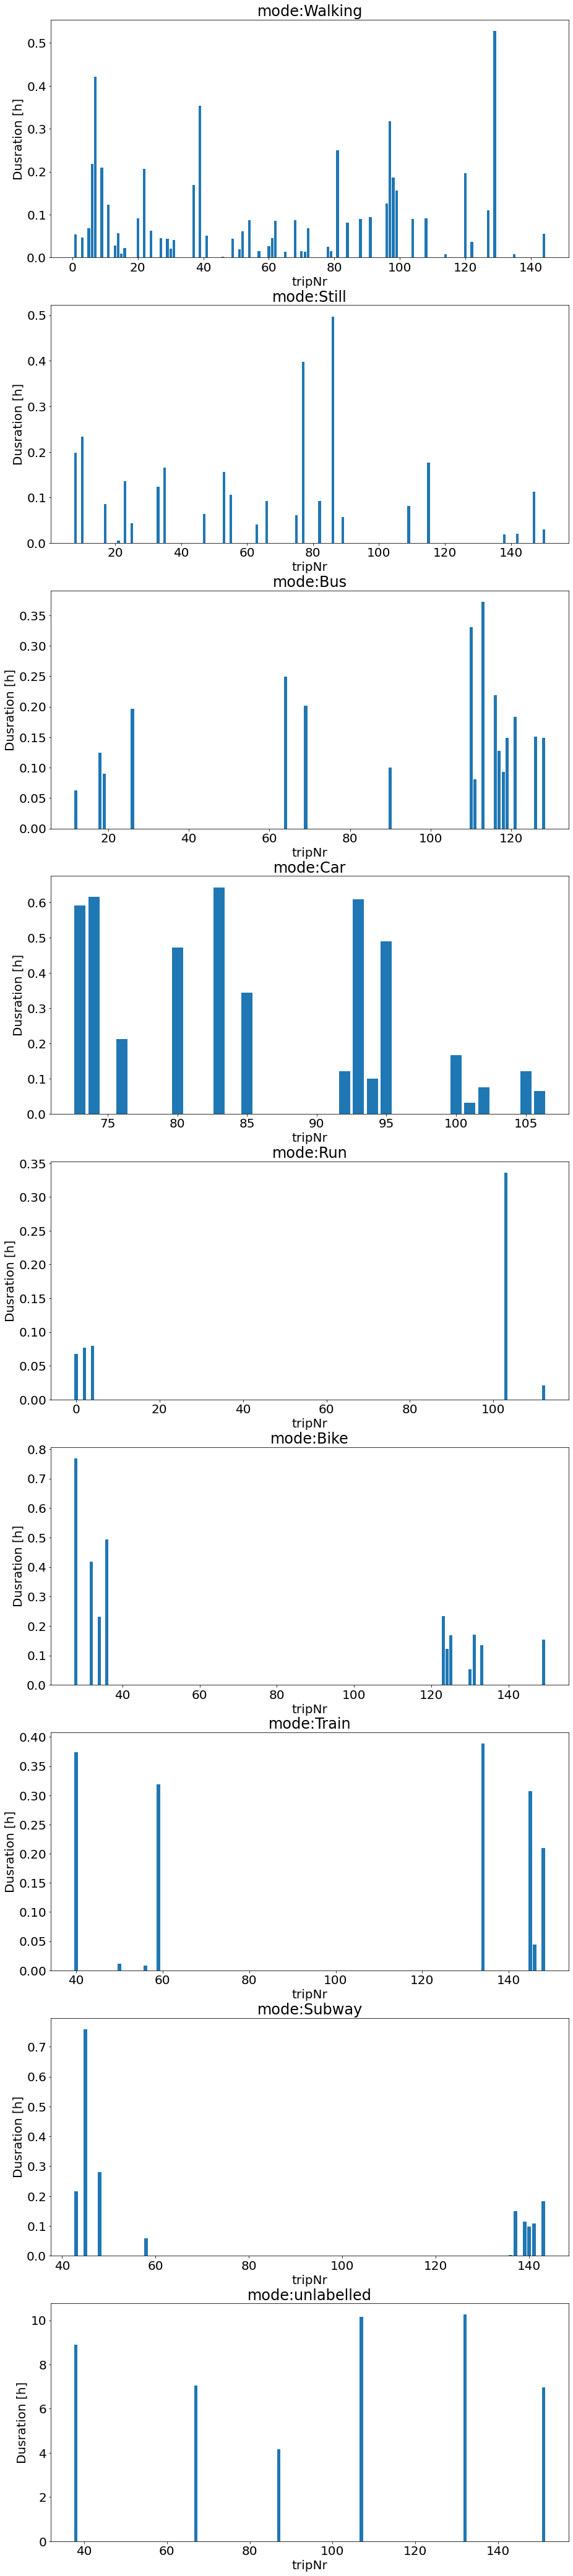

In [71]:
#visualize the duration every reseted trip per mode 
every_trip = []
duration = []
mode = gdf_o_outlier['mode'].unique()
# duration = gdf_join.total_duration_s

fig,ax= plt.subplots(len(mode),figsize=(15,75))

index =0
for i in mode:
    for j in range(len(gdf_join)):
        if gdf_join.iloc[j,1] == i:
            every_trip.append(gdf_join.index[j])
            duration.append(gdf_join.total_duration_s[j]/3600)
    ax[index].bar(every_trip,duration)
    ax[index].set_title('mode:'+i)
    ax[index].set_ylabel("Dusration [h]")
    ax[index].set_xlabel("tripNr")
    every_trip = []
    duration = []
    index = index + 1


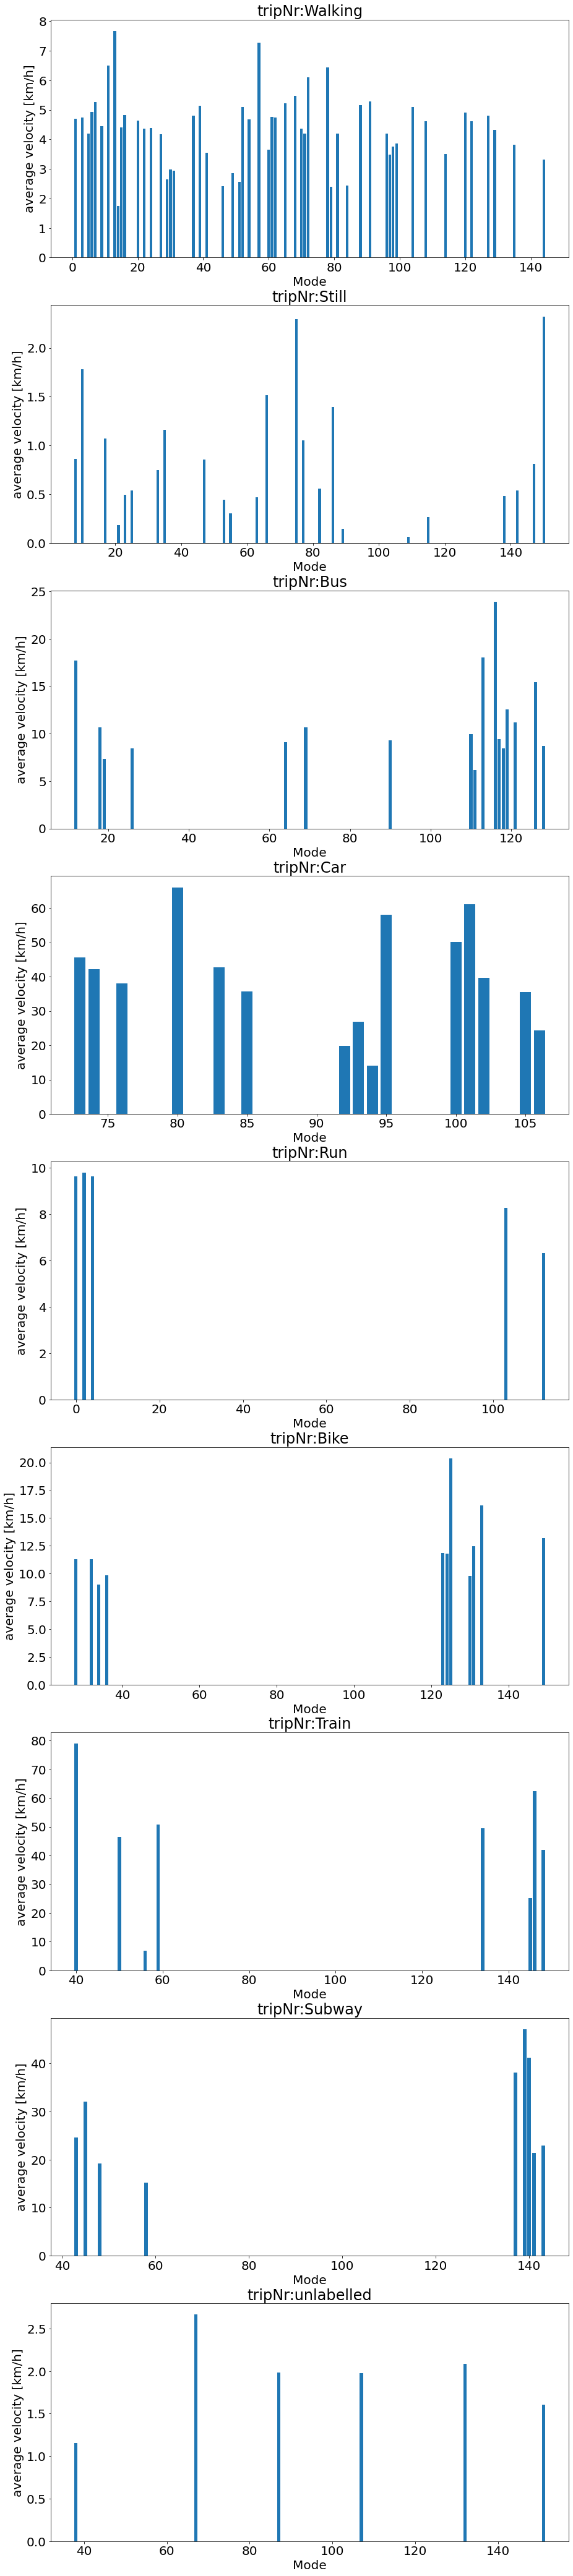

In [72]:
#visualize the average velocity every reseted trip per mode 
every_trip = []
vel_mean = []
trip = gdf_o_outlier['mode'].unique()
# duration = gdf_join.total_duration_s

fig,ax= plt.subplots(len(trip),figsize=(15,75))

index =0
for i in trip:
    for j in range(len(gdf_join)):
        if gdf_join.iloc[j,1] == i:
            every_trip.append(gdf_join.index[j])
            vel_mean.append(gdf_join.vel_mean[j])
    ax[index].bar(every_trip,vel_mean)
    ax[index].set_title('tripNr:'+str(i))
    ax[index].set_ylabel("average velocity [km/h]")
    ax[index].set_xlabel("Mode")
    every_trip = []
    vel_mean =[]
    index = index + 1

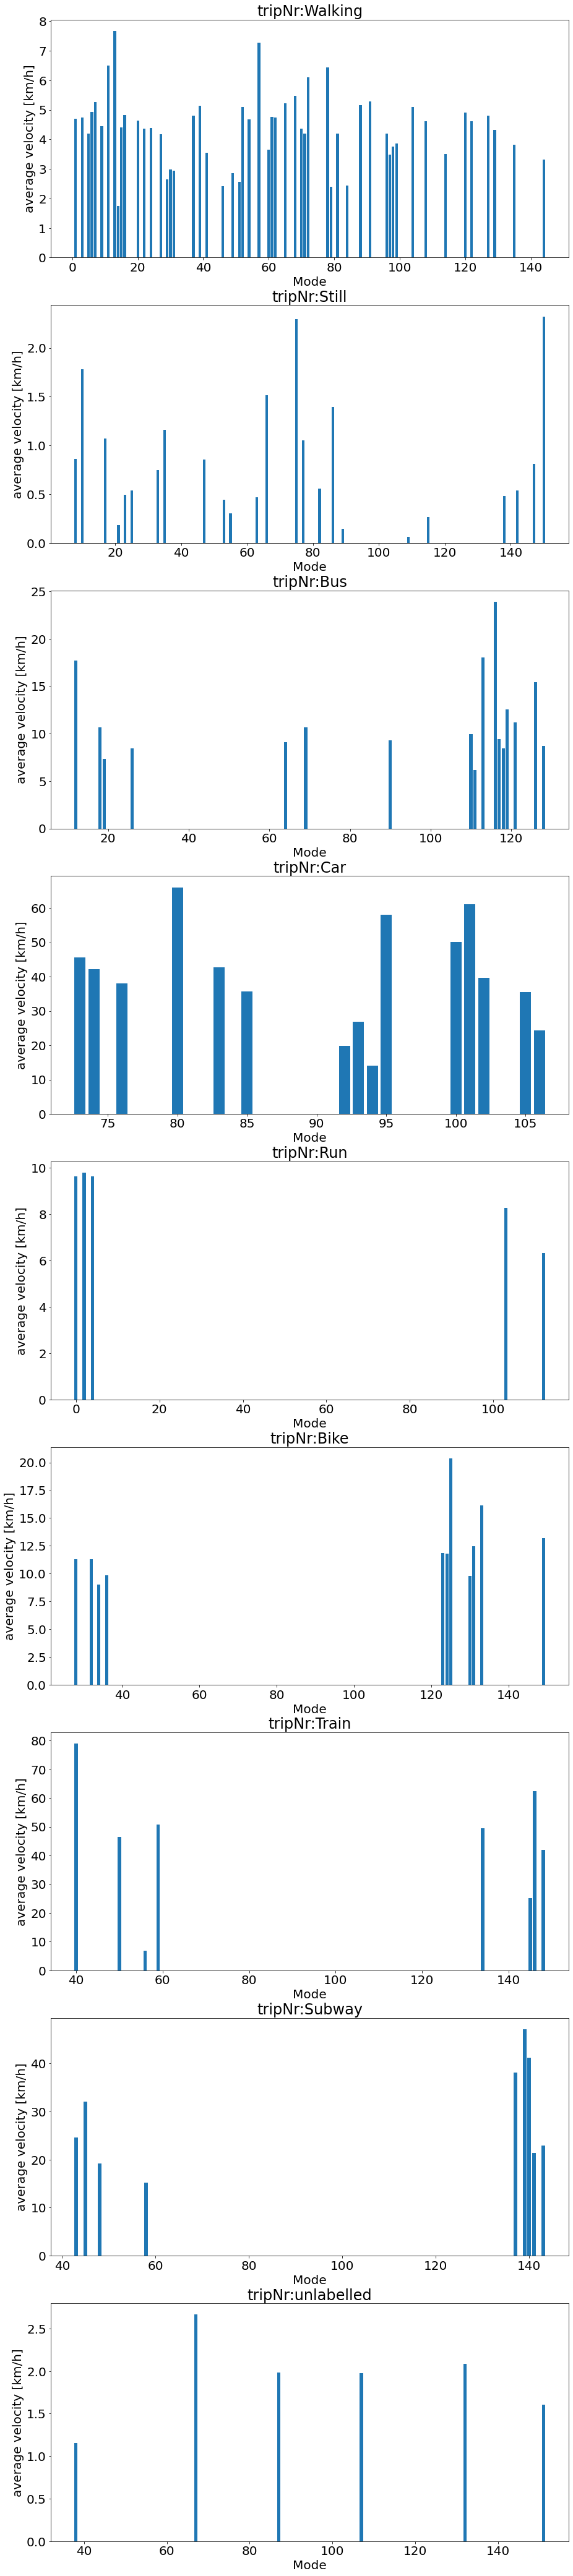

In [73]:
#visualize the average corrected velocity every reseted trip per mode 
every_trip = []
vel_corr_mean = []
trip = gdf_o_outlier['mode'].unique()
# duration = gdf_join.total_duration_s

fig,ax= plt.subplots(len(trip),figsize=(15,75))

index =0
for i in trip:
    for j in range(len(gdf_join)):
        if gdf_join.iloc[j,1] == i:
            every_trip.append(gdf_join.index[j])
            vel_corr_mean.append(gdf_join.vel_corr_mean[j])
    ax[index].bar(every_trip,vel_corr_mean)
    ax[index].set_title('tripNr:'+str(i))
    ax[index].set_ylabel("average velocity [km/h]")
    ax[index].set_xlabel("Mode")
    every_trip = []
    vel_corr_mean =[]
    index = index + 1